<img src="https://thevalley.es/wp-content/uploads/2016/11/thevalley-logo-negro.png" width="400"></img>

# Ejercicio 1 - Introducción al análisis de grafos

networkX es un paquete de software en lenguaje Python para la creación, manipulación y estudio de la estructura, dinámica y función de redes complejas.

![networkx](https://networkx.org/_static/networkx_logo.svg)

Con NetworkX puede cargar y almacenar redes en formatos de datos estándar y no estándar, generar muchos tipos de redes clásicas y aleatorias, analizar la estructura de la red, construir modelos de red, diseñar nuevos algoritmos de red, dibujar redes y mucho más.

Documentación de la librería: https://networkx.github.io/

**Notebook por: David Rey**

# Importación de librerías

In [ ]:
%matplotlib inline

import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import requests

# Creación de nuestro primer grafo (no dirigido)

Creamos nuestro primer grafo no dirigido

In [ ]:
#
# Creamos nuestro primer grafo (no dirigido)
#
G = nx.Graph()

Establecemos unas guías de estilo para visualizar mejor los grafos

In [ ]:
#
# Establecemos unas opciones de visualización
#
draw_options = {
    "font_size": 12,
    "node_size": 2000,
    "node_color": "yellow",
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3
}
draw_options_small = {
    "font_size": 8,
    "node_size": 700,
    "node_color": "yellow",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 2
}

## Añadir nodos individualmente
Podemos añadir nodos bien uno a uno o en una lista

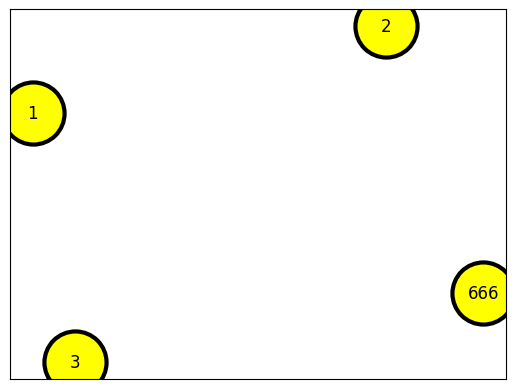

In [ ]:
#
# Añadimos nodos, lo podemos hacer individualmente o desde una lista
#
#G.add_node(1)
G.add_nodes_from([1, 2, 3])
G.add_node(666)

#
# Dibujamos nuestro grafo sin relaciones
#
nx.draw_networkx(G, **draw_options)

Podemos mejorar la visualización usando ciertas opciones de matplotlib

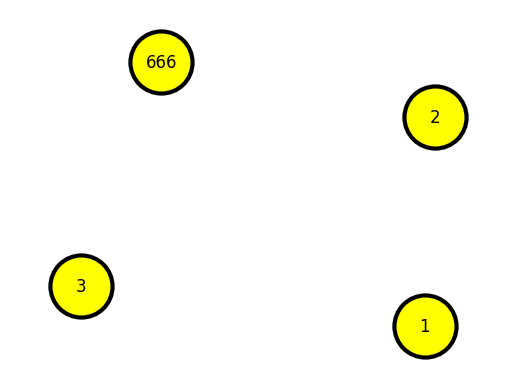

In [ ]:
# Mostramos el grafo
nx.draw_networkx(G, **draw_options)
# Establecer márgenes para los ejes para que los nodos no se corten
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

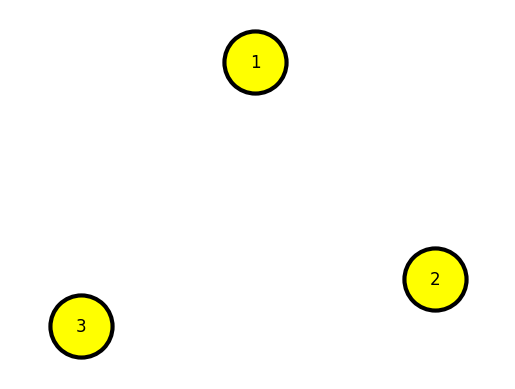

In [ ]:
#
# Eliminamos un nodo 666
#
G.remove_node(666)

#
# Mostramos el grafo
#
nx.draw_networkx(G, **draw_options)
# Establecer márgenes para los ejes para que los nodos no se corten
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [ ]:
#
# Podemos recorrer los nodos iterando por ellos
#
for u in G.nodes:
  print(' Nodo ' + str(u) )

 Nodo 1
 Nodo 2
 Nodo 3


## Añadir aristas


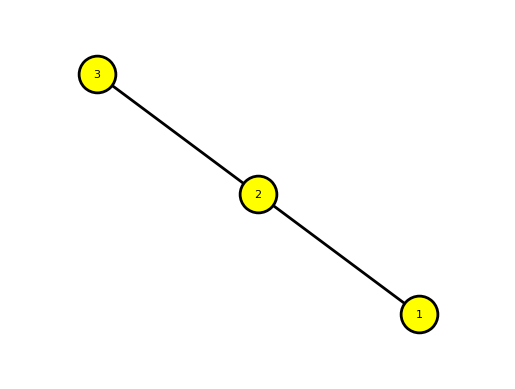

In [ ]:
#
# Podemos añadir una arista indicando los codigos de los nodos
#
G.add_edge(1, 2)
G.add_edge(3, 2)
#
# Dibujamos nuestro grafo con una primera relación
#
nx.draw_networkx(G, **draw_options_small)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [ ]:
#
# Podemos recorrer las aristas iterando sobre ellas
#
for n_1, n_2 in G.edges:
  print(' Arista de ' + str(n_1) + ' a ' + str(n_2))

 Arista de 1 a 2
 Arista de 2 a 3


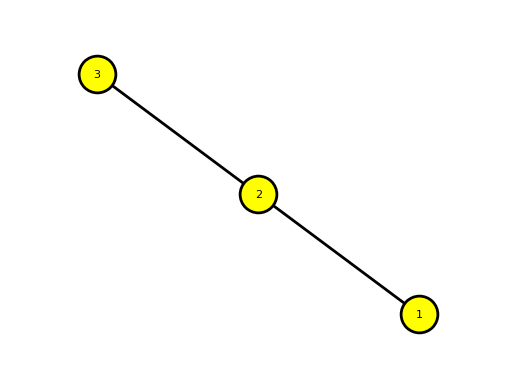

In [ ]:
#
# Importante! que las relaciones repetidas se ignoran
#
G.add_edges_from([(1,2),(2,3)])
#
nx.draw_networkx(G, **draw_options_small)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()


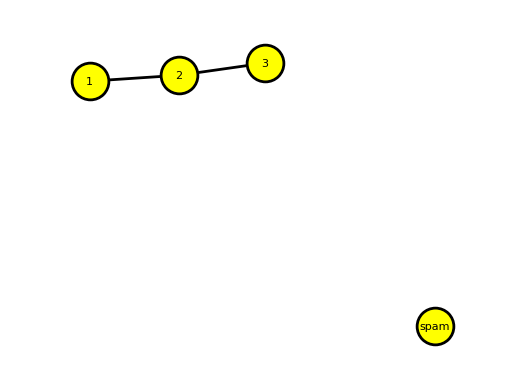

In [ ]:
#
# Añade un nodo llamado 'spam'
#
G.add_node('spam')
#
nx.draw_networkx(G, **draw_options_small)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

Ahora probamos a añadir nodos cuyo códigos no sean numéricos

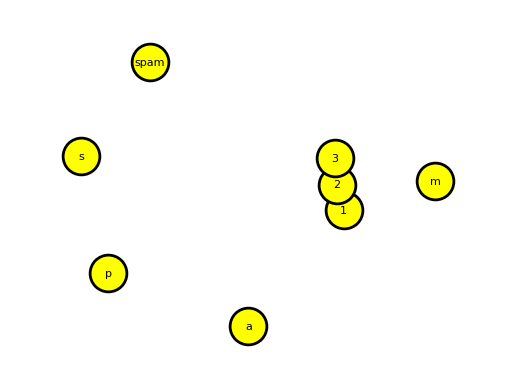

In [ ]:
#
# En cambio, si utilizamos add nodes from (entiende que es una lista, en este caso de caracteres)
# y añade 4 nodos: 's', 'p', 'a', 'm'
#
G.add_nodes_from('spam')

#
nx.draw_networkx(G, **draw_options_small)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

## Representación del grafo

En networkx un grafo se define como un diccionario de diccionarios, en particular como un diccionario de adyacencias.

* G[u] se refiere al nodo u en el grafo
* G[u][v] se refiere a la arista que va desde u a v

Networkx utiliza unas clases de tipo Vista (**View**) para representar la información

In [ ]:
#
# Mostramos las aristas (como una vista)
#

G.edges

EdgeView([(1, 2), (2, 3)])

In [ ]:
#
# Mostramos los nodos
#

G.nodes

NodeView((1, 2, 3, 'spam', 's', 'p', 'a', 'm'))

In [ ]:
#
# Mostramos las aristas como relaciones de adyacencia
#

G.adj

AdjacencyView({1: {2: {}}, 2: {1: {}, 3: {}}, 3: {2: {}}, 'spam': {}, 's': {}, 'p': {}, 'a': {}, 'm': {}})

Podemos utilizar las funciones de álgebra lineal para ver las representación de las formas dispersas y densa

In [ ]:
A = nx.adjacency_matrix(G)
#
# En formato disperso
#
print(A)

  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (2, 1)	1


In [ ]:
#
# En formato denso
#
print(A.todense())

[[0 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


Vemos como al ser un grafo no dirigido la matriz es simétrica por la diagonal

## Métricas de los grafos

In [ ]:
# Mostramos el número de nodos y de aristas
G.number_of_nodes(), G.number_of_edges()

(8, 2)

In [ ]:
# Vamos a analizar el nodo 1, mostramos sus relaciones
G[1]

AtlasView({2: {}})

In [ ]:
#
# Calculamos el grado de un nodo 1
#
G.degree(1)

#
# Existe una variante ponderada de la medida en la que le indicaríamos un grado ponderado
#  por el atributo que decidiéramos, ejemplo:
#
#   G.degree(1, weight='weight')
#

1

## Atributos de nodos / aristas

Podemos asignar atributos a los diferentes elementos del grafo:
* Al propio grafo
* Al nodo (vértice)
* A la relación (arista)

### Asignación de atributos a nodos

Podemos asignar atributos al nodo

In [ ]:
#
# Asignamos un atributo a un nodo
#
G.nodes[1]['product'] = 'house'

In [ ]:
print(G.nodes[1])
print(G[1])

{'product': 'house'}
{2: {}}


### Asignación de atributos a relaciones / aristas

In [ ]:
#
# Asignamos un atributo a una arista
#
G[1][2]['coste'] = 'alto'

In [ ]:
#
# Mostramos el contenido de la arista 1 -> 2
#
G[1][2]

{'coste': 'alto'}

## Algoritmos

Existe una gran cantidad de algoritmos disponibles, vamos a utilizar uno de los más conocidos que es **PageRank**. Calcula el nivel de popularidad como un proceso en que cada arista que termina en el nodo recibe una votación positiva.

In [ ]:
nx.pagerank(G)

{1: 0.2054045307674539,
 2: 0.3891909384650922,
 3: 0.2054045307674539,
 'spam': 0.04000000000000001,
 's': 0.04000000000000001,
 'p': 0.04000000000000001,
 'a': 0.04000000000000001,
 'm': 0.04000000000000001}

# Creación de grafos dirigidos
Hasta ahora hemos creado un grafo no dirigido, podríamos

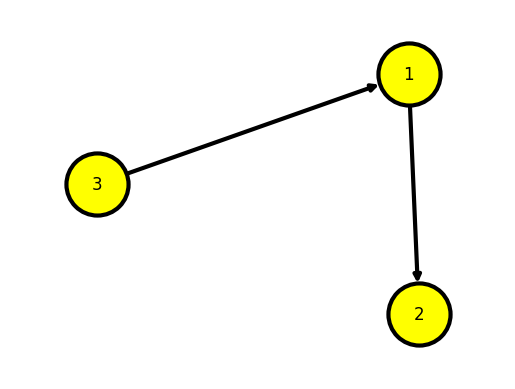

In [ ]:
#
# Creamos un grafo dirigido, en este caso incorporamos
#  un peso (coste) en la arista
#
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2 ,0.5), (3, 1, 0.75)])

#
# Mostramos el grafo
#
nx.draw_networkx(DG, **draw_options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [ ]:
#
# Calculamos el grado saliente
#
DG.in_degree(2)

1

In [ ]:
#
# Calculamos el grado (saliente ponderado)
#
DG.out_degree(1, weight='weight')

0.5

## Relaciones con nodos relacionados
Como el dato es dirigido podemos buscar las relaciones entrantes y salientes del grafo

In [ ]:
#
# Vemos los sucesores al nodo 1 (el objeto que devuelve DG.successors(1) es un iterador)
#
for item in DG.successors(1):
  print(item)

2


In [ ]:
#
# Vemos los predecesores del nodo 1 (el objeto que devuelve DG.predecessors(1) es un iterador)
#
for item in DG.predecessors(1):
  print(item)

3


## Ejemplo grafo de amistades

Crea un grafo dirigido en el que modelemos la relación entre varios amigos:

* Juan que tiene 15 años y Pedro son hermanos
* Marisa es madre de Pedro y de Juan
* Pedro se considera amigo de Julia, que tiene 17 años, pero ella no cree que Pedro es su amigo

El tipo de relación será un atributo de relación llamado: **relacion**
y el atributo de edad será un atributo llamado: **edad**

Al final mostraremos el resultado


In [ ]:
# Creamos el grafo dirigido
amigos = nx.DiGraph()

In [ ]:
# Construimos los nodos
amigos.add_node('Juan', edad=15, peso=50)
amigos.add_node('Pedro')
amigos.add_node('Marisa')
amigos.add_node('Julia', edad=17)

In [ ]:
# Mostramos el contenido de nuestro grafo
amigos.nodes(data=True)

NodeDataView({'Juan': {'edad': 15, 'peso': 50}, 'Pedro': {}, 'Marisa': {}, 'Julia': {'edad': 17}})

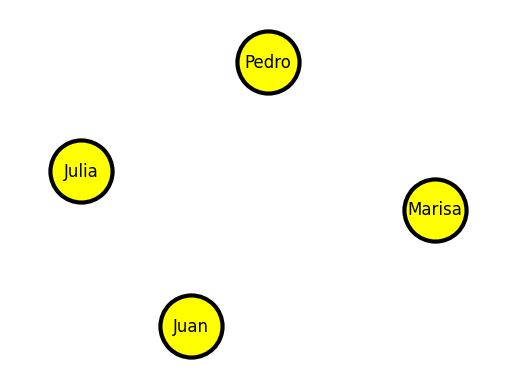

In [ ]:
#
# Vemos el resultado
#
nx.draw_networkx(amigos, **draw_options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [ ]:
# Damos de alta las relaciones
#
# Mostramos el grafo
#
amigos.add_edge('Juan', 'Pedro', relacion = 'hermano')
amigos.add_edge('Pedro', 'Juan', relacion = 'hermano')
amigos.add_edge('Marisa', 'Juan', relacion = 'madre')
amigos.add_edge('Marisa', 'Pedro', relacion = 'madre')
amigos.add_edge('Pedro', 'Julia', relacion = 'amigo')

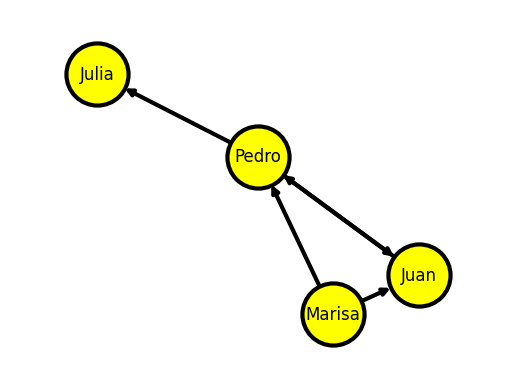

In [ ]:
#
# Vemos el resultado final
#
nx.draw_networkx(amigos, **draw_options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

Podemos mejorar la representación del grafo mostrando etiquetas en las aristas, aqui tomamos el valor de un atributo en particular.

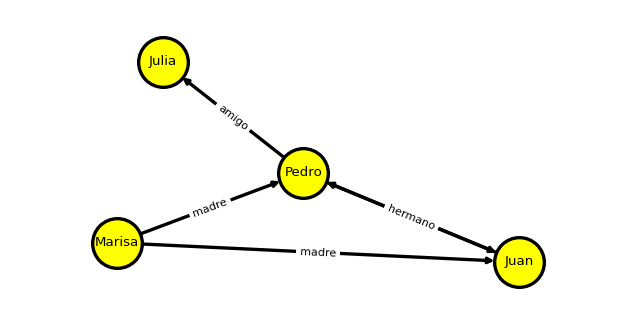

In [ ]:
#
# Mostramos el nuevo grafo
#
figure(figsize=(10, 5), dpi=80) # Ponemos un tamaño de 10 x 10

#
# Generamos unas posiciones para los elementos del grafo
#
pos=nx.spring_layout(amigos)
nx.draw_networkx(amigos, **draw_options, pos=pos)
edge_labels=dict([((u,v,),d['relacion'])
for u,v,d in amigos.edges(data=True)])
nx.draw_networkx_edge_labels(amigos,pos=pos, edge_labels=edge_labels)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

¿Cón cuantas personas tiene relación Pedro?

In [ ]:
amigos.edges('Pedro')

OutEdgeDataView([('Pedro', 'Juan'), ('Pedro', 'Julia')])

¿Y Julia?

In [ ]:
#
#
#
amigos.edges('Julia')

OutEdgeDataView([])

¿Por qué hemos obtenido este resultado?

In [ ]:
#
# Matriz de adyacencia
#
A = nx.adjacency_matrix(amigos)
print(A)
#
# Para poder entenderla un poco mejor mostramos la matriz densa
#
print(A.todense())

  (0, 1)	1
  (1, 0)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
[[0 1 0 0]
 [1 0 0 1]
 [1 1 0 0]
 [0 0 0 0]]


# Multigrafos

Existe un tipo especial de "grafos" compuesto por varios grafos, denominados **multigrafos**, permiten tener más de una arista para la misma combinación de nodos.

Las clases a utilizar son MultiGraph (*no dirigido*) o MultiDiGraph (*dirigido*)


In [ ]:
#
# Creamos un grafo
#
G = nx.MultiDiGraph(day="Friday")

G.graph
{'day': 'Friday'}

{'day': 'Friday'}

In [ ]:
#
# Añadimos unos nodos
#
G.add_node(1, time="5pm")

G.add_nodes_from([3], time="2pm")

G.nodes[1]

{'time': '5pm'}

In [ ]:
#
# Añadimos unos nodos
#
G.nodes[1]["room"] = 714
print(str(list(G.nodes(data=True))))

#
# Borramos un atributo
#
del G.nodes[1]["room"]

print(str(list(G.nodes(data=True))))

[(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm'})]
[(1, {'time': '5pm'}), (3, {'time': '2pm'})]


In [ ]:
#
# Añadimos unas aristas (las primeras)
#
key = G.add_edge(1, 2, weight=4.7)

keys = G.add_edges_from([(3, 4), (4, 5)], color="red")

#
# Añadimos las segundas aristas
#
keys = G.add_edges_from([(1, 2, {"color": "blue"}), (2, 3, {"weight": 8})])

G[1][2][0]["weight"] = 4.7

G.edges[1, 2, 0]["weight"] = 4

In [ ]:
#
# Mostramos las aristas
#
list(G.edges(data=True))

[(1, 2, {'weight': 4}),
 (1, 2, {'color': 'blue'}),
 (3, 4, {'color': 'red'}),
 (2, 3, {'weight': 8}),
 (4, 5, {'color': 'red'})]

Pregunta: ¿Qué pasa si añadimos una nueva arista 1,2 con el atributo color='**green**'?

In [ ]:
keys = G.add_edges_from([(1, 2)], color="green")
list(G.edges(data=True))

[(1, 2, {'weight': 4}),
 (1, 2, {'color': 'blue'}),
 (1, 2, {'color': 'green'}),
 (3, 4, {'color': 'red'}),
 (2, 3, {'weight': 8}),
 (4, 5, {'color': 'red'})]

# Carga de grafos desde fuentes externas

Una de las ventajas de networkx es que dispone de una serie de conectores para cargar datos en distintos formatos, entre ellos csv o bbdd.

Ver referencia https://networkx.org/documentation/stable/reference/readwrite/index.html

## Carga desde fichero de texto

Cargamos el fichero como un fichero de adyacencia en este formato en este primer fichero

https://github.com/davidreyblanco/ml-training/blob/master/data/graph/simple-adjacency.txt

El formato es:

```
nodo1 nodo2 nodo3
nodo2 nodo4
```


In [ ]:
#
# Descargamos el fichero porque networkx espera un fichero no una URL
#
url = 'https://github.com/davidreyblanco/ml-training/raw/master/data/graph/simple-adjacency.txt'
f_name = '/tmp/simple-adjacency.txt'

r = requests.get(url, allow_redirects=True)
open(f_name, 'wb').write(r.content)

17

Vemos el formato del fichero que nos hemos descargado

In [ ]:
#
# Mostramos el contenido del fichero
#
with open(f_name) as f:
     print(f.read())

A B C
B C
D C
D E


In [ ]:
#
# Construimos el grafo a partir del fichero de adyacencias
#
G_new = nx.read_adjlist(f_name, delimiter=' ')

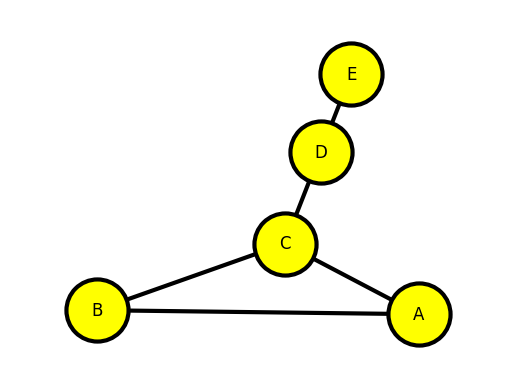

In [ ]:
#
# Mostramos el nuevo grafo
#
nx.draw_networkx(G_new, **draw_options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

## Carga desde un dataframe pandas

También podemos cargar un grafo desde un dataframe pandas, pero también podríamos trabajar con otras estructuras de la información (matrices).

https://networkx.org/documentation/stable/reference/convert.html

In [ ]:
#
# Carga de los datos, es una matriz de adyacencia
#
url = 'https://github.com/davidreyblanco/ml-training/raw/master/data/metro-stops.csv'
metro_stop = pd.read_csv(url, delimiter=';')
metro_stop.head(5)

,STOP_1,STOP_2,LINE,X_1,Y_1,X_2,Y_2,DIST,TIME
0,Las Tablas,Chamartin,8,-3.66944,40.50833,-3.68259,40.47203,4182.231631,8.36
1,Chamartin,Plaza de Castilla,1,-3.68259,40.47203,-3.68917,40.46690,797.431666,1.59
2,Chamartin,Pinar de Chamartin,3,-3.68259,40.47203,-3.66680,40.48014,1613.637696,3.23
3,Las Tablas,Pinar de Chamartin,18,-3.66944,40.50833,-3.66680,40.48014,3138.324858,6.28
4,Plaza de Castilla,Colombia,4,-3.68917,40.46690,-3.67682,40.45634,1572.338147,3.14


Cargamos a partir de un dataframe pandas, indicamos cuales son el origen y el destino de las aristas, añadimos también los atributos de las aristas

In [ ]:
G_metro = nx.from_pandas_edgelist(metro_stop,
                          source = 'STOP_1',
                          target = 'STOP_2',
                          edge_attr=True)

Vemos como carga los atributos de cada relación

In [ ]:
G_metro['Las Tablas']

AtlasView({'Chamartin': {'LINE': 8, 'X_1': -3.66944, 'Y_1': 40.50833, 'X_2': -3.68259, 'Y_2': 40.47203, 'DIST': 4182.231630548803, 'TIME': 8.36}, 'Pinar de Chamartin': {'LINE': 18, 'X_1': -3.66944, 'Y_1': 40.50833, 'X_2': -3.6668, 'Y_2': 40.48014, 'DIST': 3138.3248579055585, 'TIME': 6.28}})

Vemos la primera arista entre **Las Tablas** y **Chamartin**.

In [ ]:
G_metro['Las Tablas']['Chamartin']

{'LINE': 8,
 'X_1': -3.66944,
 'Y_1': 40.50833,
 'X_2': -3.68259,
 'Y_2': 40.47203,
 'DIST': 4182.231630548803,
 'TIME': 8.36}

## Guardar un grafo en fichero

De nuevo podemos manejar distintos formatos, en este caso vamos a guardarlo en GraphML.

Ver especificación: http://graphml.graphdrawing.org/primer/graphml-primer.html

In [ ]:
#
# Guardamos el grafo anterior en GraphML
#
f_out = '/tmp/my-first-graphml.grml'
nx.write_graphml(G_new, f_out)

In [ ]:
#
# Mostramos el contenido del fichero generado
#
with open(f_out) as f:
     print(f.read())

<?xml version='1.0' encoding='utf-8'?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd"><graph edgedefault="undirected"><node id="A"/>
<node id="B"/>
<node id="C"/>
<node id="D"/>
<node id="E"/>
<edge source="A" target="B"/>
<edge source="A" target="C"/>
<edge source="B" target="C"/>
<edge source="C" target="D"/>
<edge source="D" target="E"/>
</graph></graphml>


# Ejercicio - Crear un grafo

## Crear desde este gráfico

Construimos un grafo desde esta imagen, el tipo de relación (arista A -> B) tiene un atributo llamado 'relación' que representa la relación entre la persona A y la persona B.

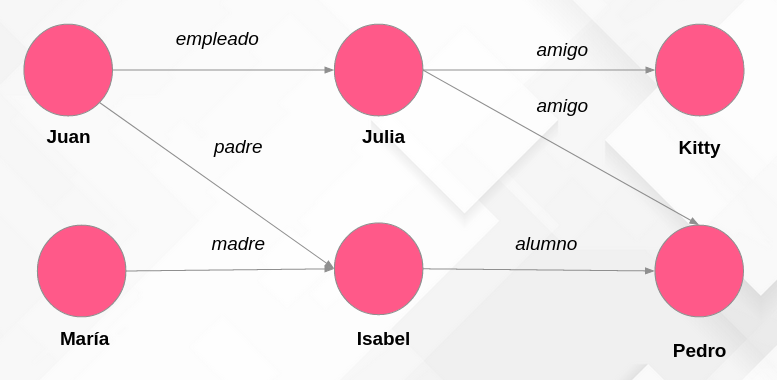

In [ ]:
#
# Creamos el grafo dirigido
#
relaciones = nx.DiGraph()

In [ ]:
#
# Construimos los nodos
#
relaciones.add_node('Juan')
relaciones.add_node('María')
relaciones.add_node('Isabel')
relaciones.add_node('Pedro')
relaciones.add_node('Kitty')

In [ ]:
#
# Damos de alta las relaciones
#
relaciones.add_edge('Juan', 'Julia', relacion = 'empleado')
relaciones.add_edge('Juan', 'Isabel', relacion = 'padre')
relaciones.add_edge('María', 'Isabel', relacion = 'madre')
relaciones.add_edge('Julia', 'Kitty', relacion = 'amigo')
relaciones.add_edge('Julia', 'Pedro', relacion = 'amigo')
relaciones.add_edge('Isabel', 'Pedro', relacion = 'alumno')

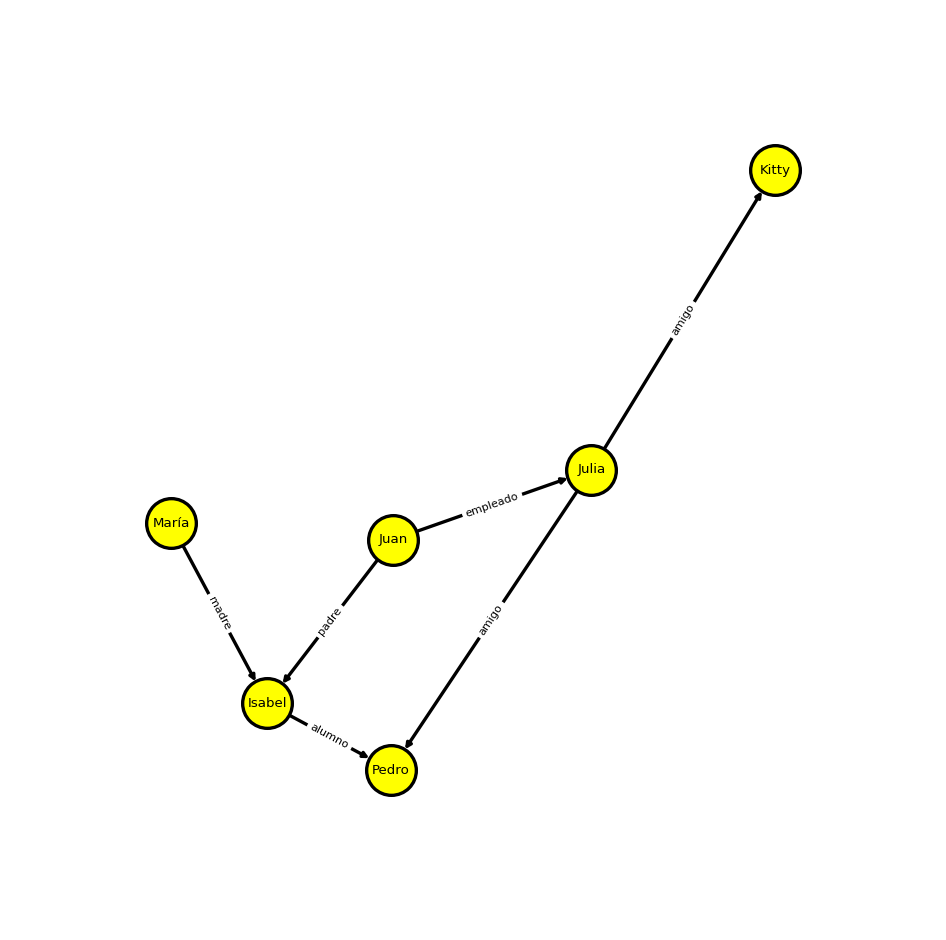

In [ ]:
#
# Mostramos el nuevo grafo
#
figure(figsize=(15, 15), dpi=80)
pos=nx.spring_layout(relaciones)
nx.draw_networkx(relaciones, **draw_options, pos=pos)
edge_labels=dict([((u,v,),d['relacion'])
for u,v,d in relaciones.edges(data=True)])
nx.draw_networkx_edge_labels(relaciones,pos=pos, edge_labels=edge_labels)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

## Añadir atributos

Añadimos la edad de María a 25 años y la Pedro a 53

In [ ]:
relaciones.nodes['María']['edad'] = 25
relaciones.nodes['Pedro']['edad'] = 53

In [ ]:
#
# Mostramos la edad de María
#
print('María tiene ' + str(relaciones.nodes['María']['edad'])+ ' años')
print('Pedro tiene ' + str(relaciones.nodes['Pedro']['edad'])+ ' años')

María tiene 25 años
Pedro tiene 53 años


## Algunas preguntas

¿Qué relación tienen Juan e Isabel?

In [ ]:
a = 'Juan'
b = 'Isabel'

if b in relaciones[a]:
  relacion = relaciones[a][b]['relacion']
  print(a + ' es ' + relacion + ' de ' + b)
else:
  print(a + ' no tiene relación con ' + b)

Juan es padre de Isabel


¿Y María y Pedro?

In [ ]:
a = 'María'
b = 'Pedro'

if b in relaciones[a]:
  relacion = relaciones[a][b]['relacion']
  print(a + ' es ' + relacion + ' de ' + b)
else:
  print(a + ' no tiene relación con ' + b)

María no tiene relación con Pedro


¿Con quién tiene relación Julia?

In [ ]:
a = 'Julia'

print('Relaciones de ' + a + ':')
for b in relaciones[a]:
  relacion = relaciones[a][b]['relacion']
  print('   ' + a + ' es ' + relacion + ' de ' + b)


Relaciones de Julia:
   Julia es amigo de Kitty
   Julia es amigo de Pedro


¿Qué amigos tienen las personas relacionadas con Juan?

In [ ]:
a = 'Juan'

print('Amigos de las relaciones de ' + a + ':')
for b in relaciones[a]:
  for c in relaciones[b]:
    relacion = relaciones[b][c]['relacion']
    if relacion == 'amigo':
      print('   ' + b + ' es ' + relacion + ' de ' + c)

Amigos de las relaciones de Juan:
   Julia es amigo de Kitty
   Julia es amigo de Pedro


¿Qué personas no tienen amigos?

In [ ]:
#
# Es más directo identificar que personas tienen amigos y buscar los nodos que no estén en esta lista
#
con_amigos = []
for u, v in relaciones.edges:
  if relaciones[u][v]['relacion'] == 'amigo':
    con_amigos.append(u)

#
# Calculamos el resultado como la diferencia de conjuntos
#
set(relaciones.nodes) - set(con_amigos)
set(con_amigos)

{'Julia'}

¿Quién es la persona mejor conectada de nuestra mini red social?, grado de salida (función out_degree)

In [ ]:
#
# Cálculo de métricas
#
for u in relaciones:
  grado = relaciones.out_degree(u)
  if grado > 0:
    print('El grado de ' + u + ' es ' + str(grado))


El grado de Juan es 2
El grado de María es 1
El grado de Isabel es 1
El grado de Julia es 2


¿Quién es el más popular? (usamos el algoritmo **PageRank**), ¿esperabamos este resultado?

In [ ]:
nx.pagerank(relaciones)

{'Juan': 0.09220838165338213,
 'María': 0.09220838165338213,
 'Isabel': 0.20977452443778732,
 'Pedro': 0.3263595209272522,
 'Kitty': 0.14805209541334552,
 'Julia': 0.13139709591485052}

## Guardamos los datos en graphml

Guardamos los resultados en GraphML y mostramos el resultado

In [ ]:
#
# Guardamos el grafo anterior en GraphML
#
f_out = '/tmp/relaciones.grml'
nx.write_graphml(relaciones, f_out)

In [ ]:
#
# Mostramos el contenido del fichero generado
#
with open(f_out) as f:
     print(f.read())

<?xml version='1.0' encoding='utf-8'?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd"><key id="d1" for="edge" attr.name="relacion" attr.type="string"/>
<key id="d0" for="node" attr.name="edad" attr.type="long"/>
<graph edgedefault="directed"><node id="Juan"/>
<node id="María">
  <data key="d0">25</data>
</node>
<node id="Isabel"/>
<node id="Pedro">
  <data key="d0">53</data>
</node>
<node id="Kitty"/>
<node id="Julia"/>
<edge source="Juan" target="Julia">
  <data key="d1">empleado</data>
</edge>
<edge source="Juan" target="Isabel">
  <data key="d1">padre</data>
</edge>
<edge source="María" target="Isabel">
  <data key="d1">madre</data>
</edge>
<edge source="Isabel" target="Pedro">
  <data key="d1">alumno</data>
</edge>
<edge source="Julia" target="Kitty">
  <data key="d1">amigo</data>
</edge>
<edge source="Julia" 